In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the final cleaned dataset
cleaned_df = pd.read_csv('census_epa_theil_cleaned.csv')

In [3]:
cleaned_df.head(3)

,ID,NAME,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,AREALAND,pop_tot,pop_white_only,pop_black,...,UST,PWDIS,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,prim_ind_share,sec_ind_share,health_ins_pct,theil_income_median
0,1001020100,"Census Tract 201, Autauga County, Alabama",Alabama,AL,Autauga,4.0,9825304.0,1791.0,1502.0,199.0,...,0.330720,0.086036,83.863763,11.111111,2.400893,1.563372,0.111669,4.969291,90.954774,0.000003
1,1001020200,"Census Tract 202, Autauga County, Alabama",Alabama,AL,Autauga,4.0,3320818.0,2010.0,785.0,1175.0,...,2.208384,0.097622,39.054726,58.457711,2.736318,0.497512,0.000000,6.746712,93.024585,0.000004
2,1001020300,"Census Tract 203, Autauga County, Alabama",Alabama,AL,Autauga,4.0,5349271.0,3577.0,2433.0,1105.0,...,1.830997,0.001432,68.017892,30.891809,3.634330,0.363433,0.000000,7.450098,96.232780,0.000002


In [4]:
cleaned_df.isnull().sum()

ID                             0
NAME                           0
STATE_NAME                     0
ST_ABBREV                      0
CNTY_NAME                      0
REGION                         0
AREALAND                       0
pop_tot                        0
pop_white_only                 0
pop_black                      0
pop_asian                      0
pop_hispanic_latino_any        0
industry_tot                   0
industry_ag_for                0
industry_const                 0
industry_manu                  0
industry_transp                0
pop_density                    0
poverty_pct                    0
income_median                  0
health_ins_tot                 0
health_ins_yes                 0
health_ins_no                  0
PM25                           0
OZONE                          0
DSLPM                          0
PTRAF                          0
PRE1960PCT                     0
PNPL                           0
PRMP                           0
PTSDF     

In [5]:
# Selecting the urban data with a population density of more than 500

df = cleaned_df[cleaned_df['pop_density'] > 500]

In [6]:
# Selecting the relevant columns that will be used for the model
# PM25 is the target variable
# The other variables are the features

rel_cols = ['PM25', 'OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST', 'PWDIS', 'pct_pop_white_only', 'pct_pop_black', 'pct_pop_asian', 'pct_pop_hispanic_latino_any', 'pop_density', 'prim_ind_share', 'sec_ind_share', 'poverty_pct', 'theil_income_median', 'health_ins_pct']

In [7]:
model_df = df[rel_cols]

In [8]:
model_df.head(3)

,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct
1,9.722213,60.02012,0.176942,65.510247,0.294511,0.072671,0.082691,0.067863,2.208384,0.097622,39.054726,58.457711,2.736318,0.497512,605.272556,0.000000,6.746712,6.6,4.435235e-06,93.024585
2,9.743874,59.90393,0.204497,46.665740,0.087077,0.075500,0.082142,0.071178,1.830997,0.001432,68.017892,30.891809,3.634330,0.363433,668.689248,0.000000,7.450098,17.2,1.944627e-06,96.232780
3,9.766758,59.95221,0.242509,144.572390,0.081486,0.084302,0.087589,0.079793,2.958719,0.000062,89.689637,7.048922,0.920568,0.736454,595.525072,0.079051,11.646904,8.1,7.687476e-07,95.177866


In [9]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 1 to 80147
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PM25                         48660 non-null  float64
 1   OZONE                        48660 non-null  float64
 2   DSLPM                        48660 non-null  float64
 3   PTRAF                        48660 non-null  float64
 4   PRE1960PCT                   48660 non-null  float64
 5   PNPL                         48660 non-null  float64
 6   PRMP                         48660 non-null  float64
 7   PTSDF                        48660 non-null  float64
 8   UST                          48660 non-null  float64
 9   PWDIS                        48660 non-null  float64
 10  pct_pop_white_only           48660 non-null  float64
 11  pct_pop_black                48660 non-null  float64
 12  pct_pop_asian                48660 non-null  float64
 13  pct_pop_hispanic

In [10]:
model_df.describe()

,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS,pct_pop_white_only,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,4.866000e+04,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000
mean,8.399646,63.008164,0.348491,322.276092,0.340770,0.172319,0.531623,2.968207,5.787213,2.804354e+01,60.501119,18.794408,8.571449,21.892954,3391.516251,0.391003,7.422150,14.486967,0.000001,90.864527
std,1.386478,6.346916,0.205838,540.270208,0.296705,0.318608,0.772425,4.548543,8.520505,1.817666e+03,25.532598,23.901799,11.699568,23.569227,5764.039199,1.111526,3.995210,12.083903,0.000006,7.818534
min,2.865505,43.585200,0.015866,0.010887,0.000000,0.002087,0.006408,0.006591,0.000000,5.526000e-12,0.000000,0.000000,0.000000,0.000000,500.002938,0.000000,0.000000,0.000000,-0.000015,24.155578
25%,7.458514,59.419762,0.219173,85.740125,0.045722,0.043385,0.123807,0.375955,1.058398,1.254224e-04,43.538564,3.148820,1.354531,4.984195,1040.498830,0.000000,4.658856,5.600000,-0.000003,87.665254
50%,8.431502,62.994390,0.301019,160.400848,0.283611,0.086753,0.218342,1.382861,2.953289,3.339829e-03,65.826630,8.728894,4.424478,12.507523,1744.004668,0.000000,6.936784,10.900000,0.000001,93.066784
75%,9.419218,66.283658,0.411496,321.449695,0.604679,0.165646,0.628315,3.615433,6.792924,7.161709e-02,81.440325,23.487337,10.743097,30.415183,3120.538178,0.373529,9.644852,20.100000,0.000005,96.409275
max,12.137195,100.257230,1.996183,12256.652984,1.000000,11.891744,13.682186,73.535511,126.661351,2.589740e+05,100.000000,100.000000,96.443031,100.000000,119744.771358,36.585366,218.292683,95.200000,0.000042,100.000000


<Figure size 1500x600 with 0 Axes>

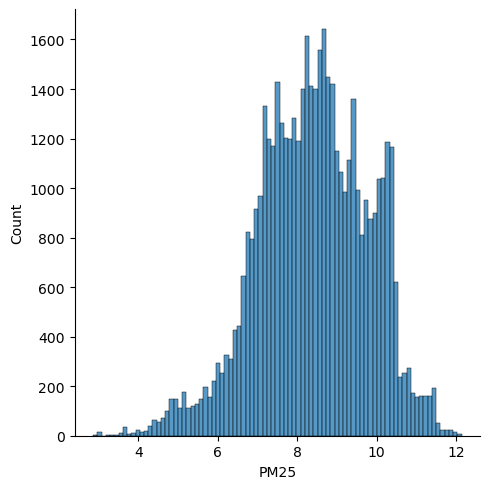

In [11]:
# Distribution of PM25 in the dataset

plt.figure(figsize=(15,6))
sns.displot(model_df['PM25'])

In [12]:
# Converting the target variable to a categorical variable
# PM25 values greater than 9 are considered unhealthy

model_df['PM25_risk'] = model_df['PM25'].apply(lambda x: 1 if x>9 else 0)

/var/folders/_2/3t2c95cn5sjcvt63r1qfngh00000gn/T/ipykernel_4892/75472975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['PM25_risk'] = model_df['PM25'].apply(lambda x: 1 if x>9 else 0)


In [13]:
len(model_df[model_df['PM25'] > 9])

16466

In [14]:
model_df['PM25_risk'].value_counts()

0    32194
1    16466
Name: PM25_risk, dtype: int64

### EDA

In [15]:
# Correlation Matrix
model_df.describe()

,PM25,OZONE,DSLPM,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,UST,PWDIS,...,pct_pop_black,pct_pop_asian,pct_pop_hispanic_latino_any,pop_density,prim_ind_share,sec_ind_share,poverty_pct,theil_income_median,health_ins_pct,PM25_risk
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,4.866000e+04,...,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000
mean,8.399646,63.008164,0.348491,322.276092,0.340770,0.172319,0.531623,2.968207,5.787213,2.804354e+01,...,18.794408,8.571449,21.892954,3391.516251,0.391003,7.422150,14.486967,0.000001,90.864527,0.338389
std,1.386478,6.346916,0.205838,540.270208,0.296705,0.318608,0.772425,4.548543,8.520505,1.817666e+03,...,23.901799,11.699568,23.569227,5764.039199,1.111526,3.995210,12.083903,0.000006,7.818534,0.473166
min,2.865505,43.585200,0.015866,0.010887,0.000000,0.002087,0.006408,0.006591,0.000000,5.526000e-12,...,0.000000,0.000000,0.000000,500.002938,0.000000,0.000000,0.000000,-0.000015,24.155578,0.000000
25%,7.458514,59.419762,0.219173,85.740125,0.045722,0.043385,0.123807,0.375955,1.058398,1.254224e-04,...,3.148820,1.354531,4.984195,1040.498830,0.000000,4.658856,5.600000,-0.000003,87.665254,0.000000
50%,8.431502,62.994390,0.301019,160.400848,0.283611,0.086753,0.218342,1.382861,2.953289,3.339829e-03,...,8.728894,4.424478,12.507523,1744.004668,0.000000,6.936784,10.900000,0.000001,93.066784,0.000000
75%,9.419218,66.283658,0.411496,321.449695,0.604679,0.165646,0.628315,3.615433,6.792924,7.161709e-02,...,23.487337,10.743097,30.415183,3120.538178,0.373529,9.644852,20.100000,0.000005,96.409275,1.000000
max,12.137195,100.257230,1.996183,12256.652984,1.000000,11.891744,13.682186,73.535511,126.661351,2.589740e+05,...,100.000000,96.443031,100.000000,119744.771358,36.585366,218.292683,95.200000,0.000042,100.000000,1.000000


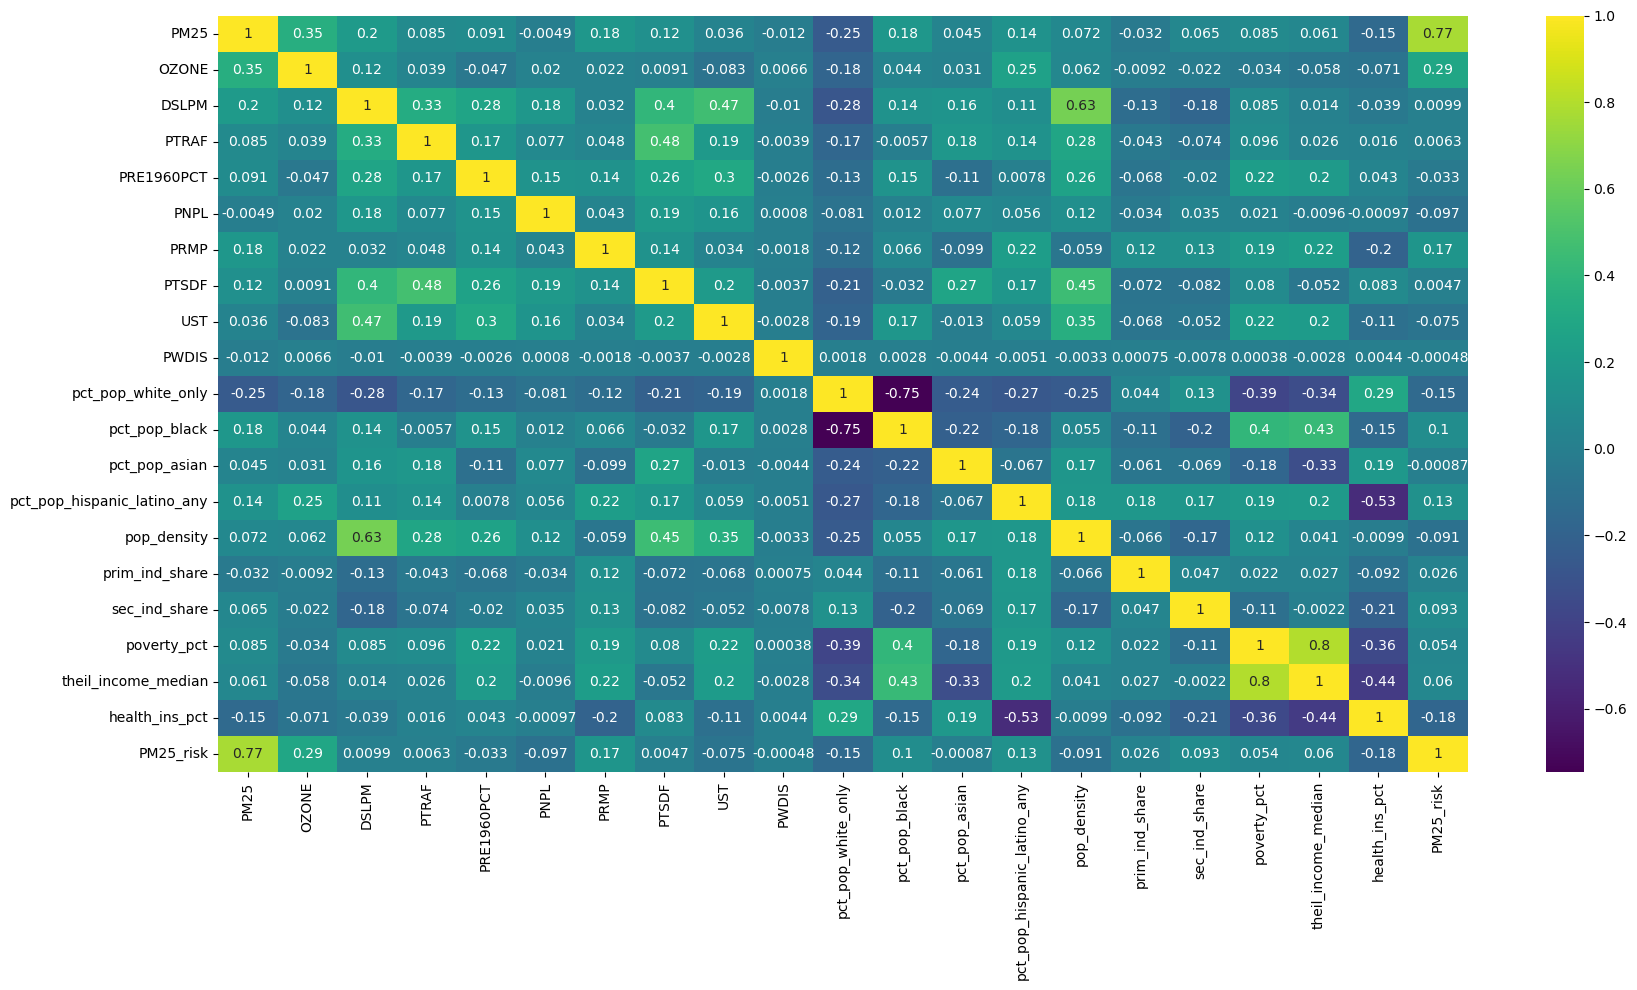

In [16]:
plt.figure(figsize=(18, 10))
sns.heatmap(model_df.corr(), annot=True, cmap='viridis')
plt.tight_layout()

<Axes: xlabel='pct_pop_white_only', ylabel='pct_pop_black'>

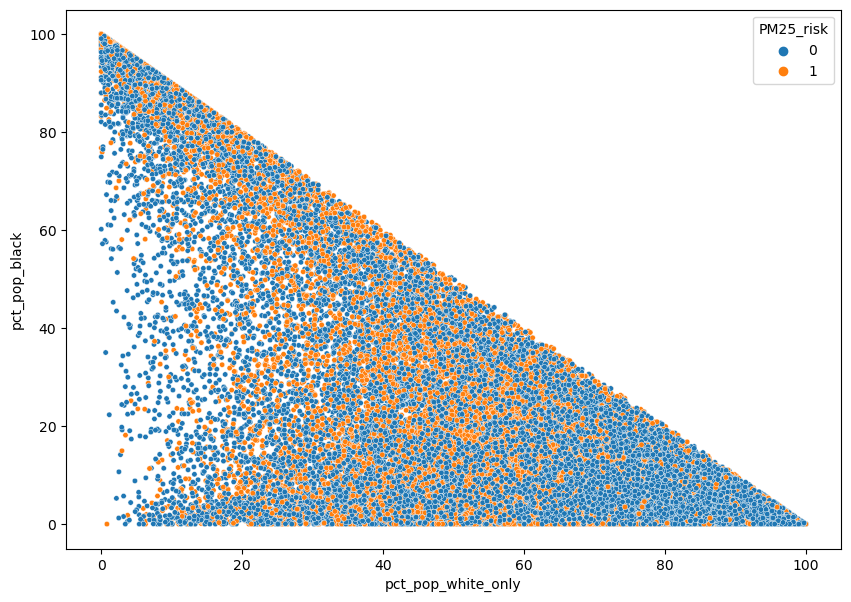

In [17]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pct_pop_white_only', y='pct_pop_black', hue='PM25_risk', data=model_df, s=15)

<Axes: xlabel='OZONE', ylabel='Count'>

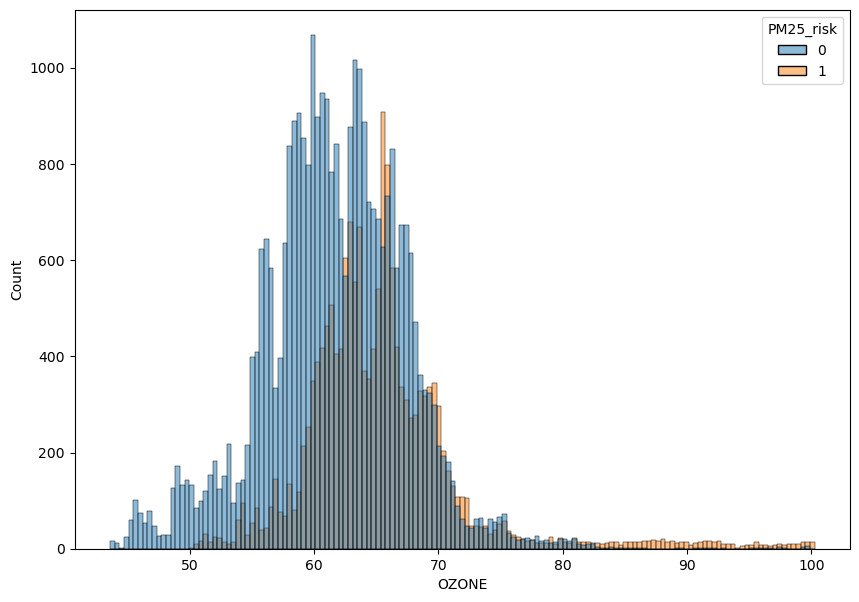

In [18]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='OZONE', hue='PM25_risk')

<Axes: xlabel='pct_pop_white_only', ylabel='Count'>

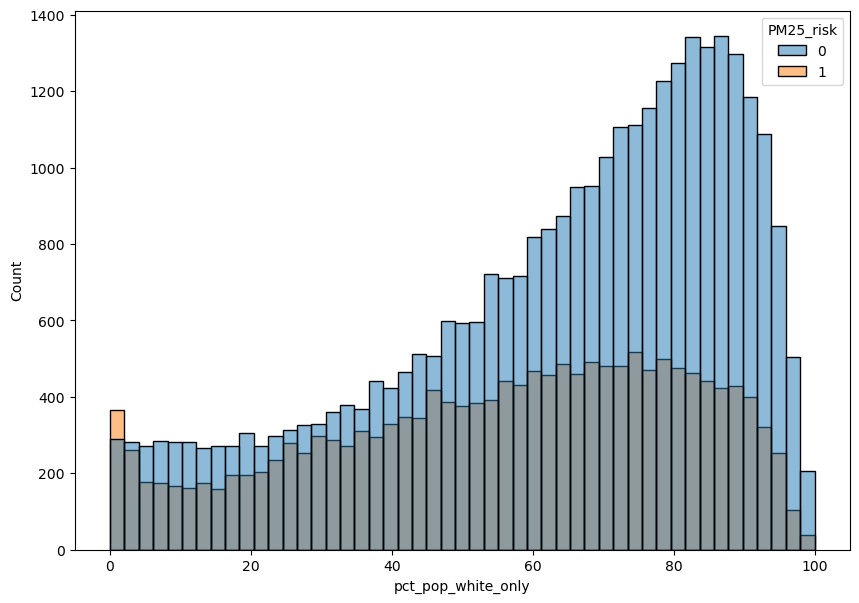

In [19]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='pct_pop_white_only', hue='PM25_risk')

<Axes: xlabel='pct_pop_black', ylabel='Count'>

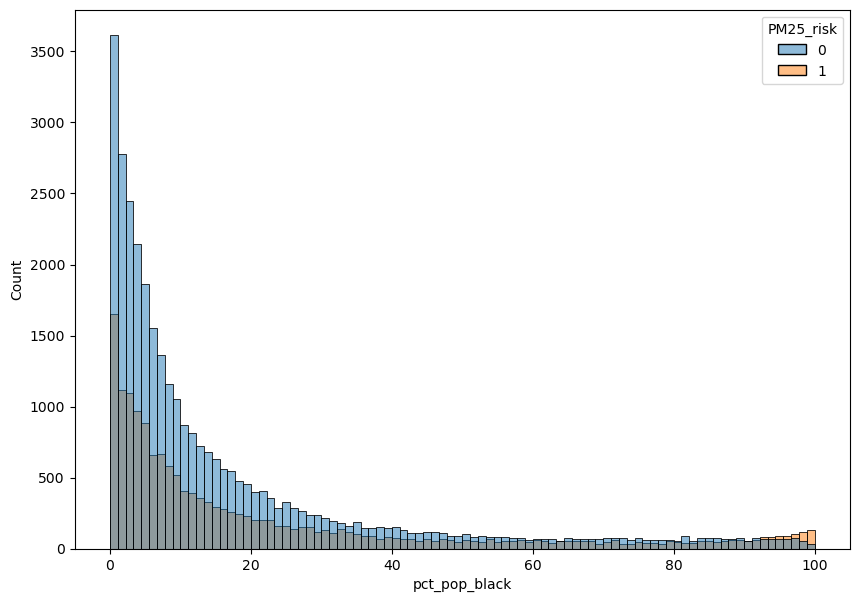

In [20]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='pct_pop_black', hue='PM25_risk')

<Axes: xlabel='health_ins_pct', ylabel='Count'>

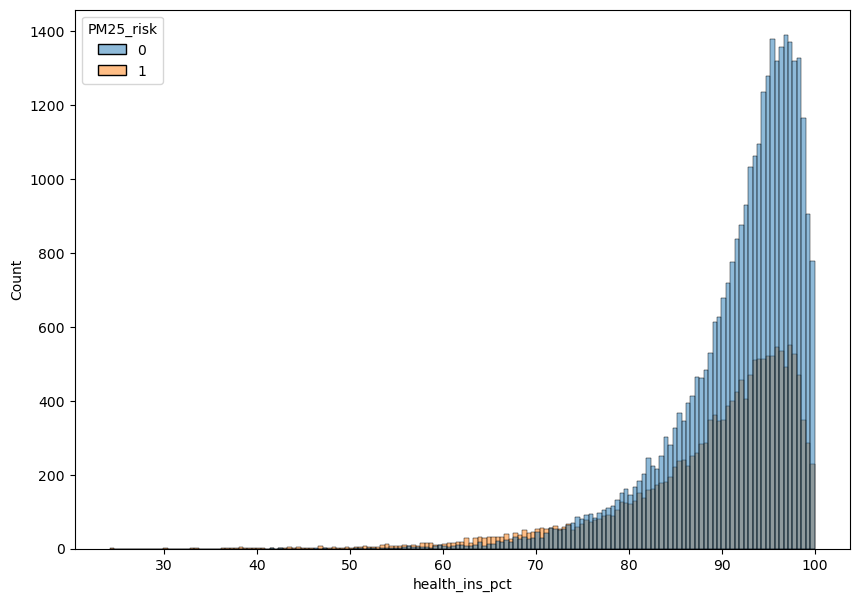

In [21]:
plt.figure(figsize=(10, 7))
sns.histplot(data=model_df, x='health_ins_pct', hue='PM25_risk')

In [22]:
# OZONE and PM25 are highly correlated
# white and non-white population have mild correlation with PM25

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Splitting the dataset into train, val, and test sets
# data split into train_val=75% and test=25%
# train_val further split into train=85% and val=15%

X = model_df.drop(['PM25', 'PM25_risk'], axis=1)
y = model_df['PM25_risk']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=201, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=201, stratify=y_train_val)

In [25]:
print(y.value_counts())
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

0    32194
1    16466
Name: PM25_risk, dtype: int64
0    20523
1    10497
Name: PM25_risk, dtype: int64
0    3622
1    1853
Name: PM25_risk, dtype: int64
0    8049
1    4116
Name: PM25_risk, dtype: int64


In [26]:
print(16466/len(y))
print(10497/len(y_train))
print(1853/len(y_val))
print(4116/len(y_test))

0.3383888203863543
0.338394584139265
0.3384474885844749
0.338347718865598


In [27]:
# Scaling the data

from sklearn.preprocessing import MinMaxScaler

In [28]:
X_train.columns

Index(['OZONE', 'DSLPM', 'PTRAF', 'PRE1960PCT', 'PNPL', 'PRMP', 'PTSDF', 'UST',
       'PWDIS', 'pct_pop_white_only', 'pct_pop_black', 'pct_pop_asian',
       'pct_pop_hispanic_latino_any', 'pop_density', 'prim_ind_share',
       'sec_ind_share', 'poverty_pct', 'theil_income_median',
       'health_ins_pct'],
      dtype='object')

In [29]:
# everything will be min_max scaled

In [30]:
min_max_scaler = MinMaxScaler()

In [31]:
min_max_scaler.fit(X_train)

MinMaxScaler()

In [32]:
X_train = min_max_scaler.transform(X_train)
X_val = min_max_scaler.transform(X_val)

### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dec_tree = DecisionTreeClassifier()

In [35]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred = dec_tree.predict(X_val)

In [37]:
# Evaluation Metrics

from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print('Confusion Matrix: \n\n', confusion_matrix(y_val, y_pred))
print('\n Classification Report: \n\n', classification_report(y_val, y_pred))

Confusion Matrix: 

 [[3135  487]
 [ 484 1369]]

 Classification Report: 

               precision    recall  f1-score   support

           0       0.87      0.87      0.87      3622
           1       0.74      0.74      0.74      1853

    accuracy                           0.82      5475
   macro avg       0.80      0.80      0.80      5475
weighted avg       0.82      0.82      0.82      5475



In [39]:
# Visualizing the Decision Tree

from sklearn.tree import plot_tree

In [40]:
print('\n Tree Depth = ', dec_tree.get_depth(), '\n No. of leaves = ', dec_tree.get_n_leaves())


 Tree Depth =  29 
 No. of leaves =  2762


In [41]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

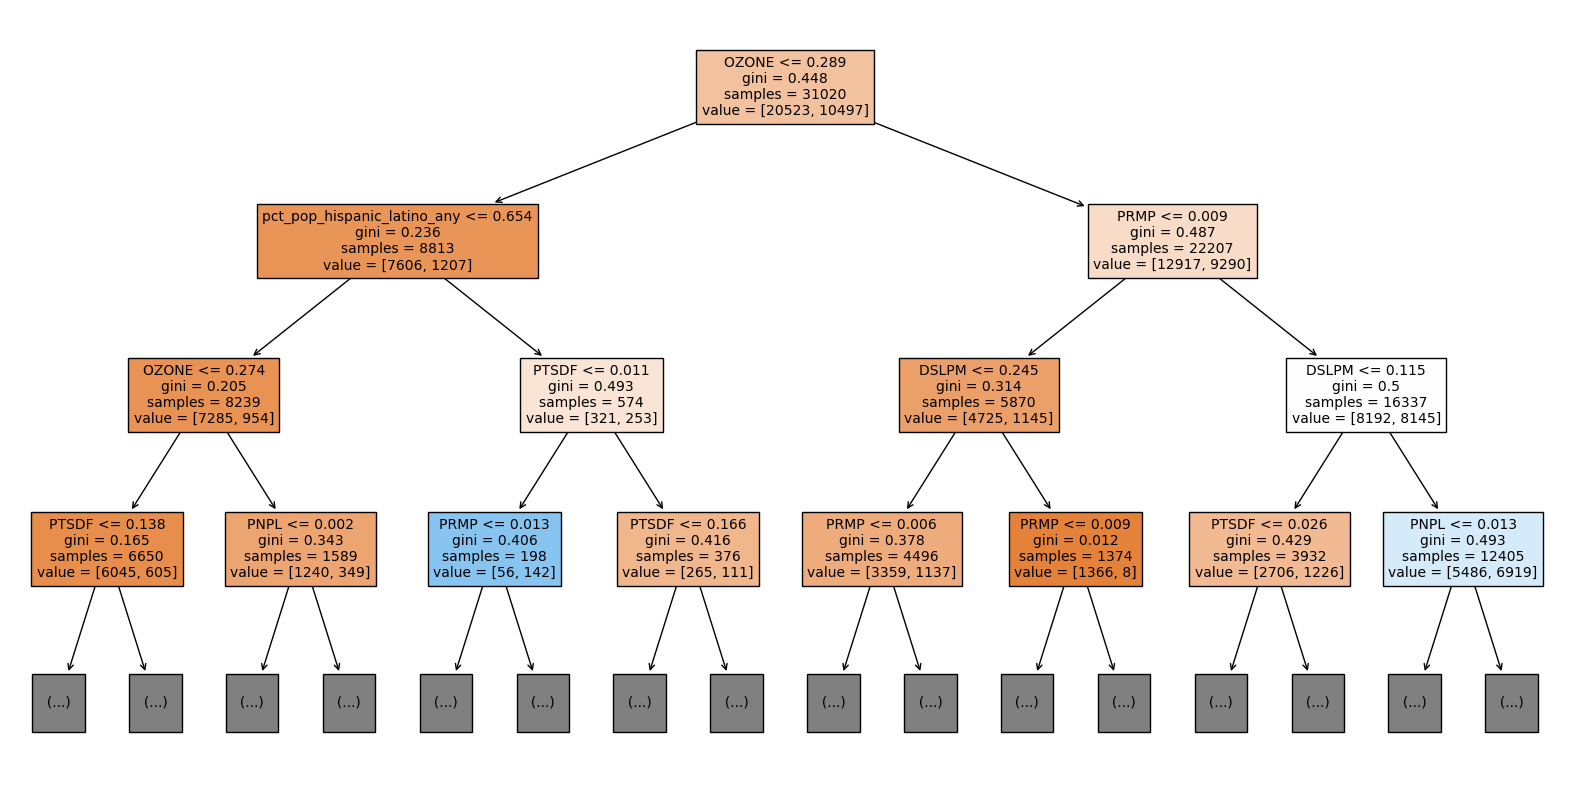

In [42]:
plt.figure(figsize=(20,10))
plot_tree(dec_tree, fontsize=10, max_depth=3, filled=True, feature_names=[col for col in X.columns])
plt.show()

In [43]:
# From the tree it, we see that OZONE is the most important feature for spliting the data as expected from the correlation table.
# For the next split the model uses pct_pop_hispanic_latino_any and PRMP and then other features.

In [44]:
# The Baseline model would be to predict no risk for all the tracks
# The baseline accuracy would be 67% since 67% of the tracks have no risk
# The model accuracy is 84% which is better than the baseline model

In [45]:
# We can also look at other metrics like precision, recall and f1-score

In [46]:
dec_tree.predict_proba(X_val)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [47]:
dec_tree.predict(X_val)

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
dec_tree.classes_

array([0, 1])

### Performing a Grid Search to find the best parameters for the model

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

In [50]:
def f2_fun(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

def f2_scorer():
    return make_scorer(f2_fun)

In [51]:
tree_para = {
            'criterion':['gini','entropy', 'log_loss'],
            'splitter':['best', 'random'],
            'max_depth': np.arange(1, 25),
            }

In [52]:
tree_search = GridSearchCV(
                            DecisionTreeClassifier(),
                            tree_para, 
                            cv=5, 
                            scoring= f2_scorer(), #['accuracy', 'precision', 'recall', 'f1'],
                            refit=False,
                            verbose=4, 
                            return_train_score=True,    
                            )

In [53]:
tree_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=1, splitter=best;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=1, splitter=best;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, splitter=best;, score=(train=0.000, test=0.000) total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, splitter=best;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, splitter=best;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, splitter=random;, score=(train=0.000, test=0.000) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, splitter=random;, score=(train=0.059, test=0.069) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, splitter=random;, score=(train=0.035, test=0.040) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, splitter=random;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'splitter': ['best', 'random']},
             refit=False, return_train_score=True, scoring=make_scorer(f2_fun),
             verbose=4)

In [54]:
f2_grid_results = pd.DataFrame(tree_search.cv_results_)

In [55]:
f2_grid_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051337,0.006055,0.002034,0.000376,gini,1,best,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.0,0.000000,...,0.000000,0.000000,139,0.0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.003575,0.000318,0.001593,0.000039,gini,1,random,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.0,0.068925,...,0.021815,0.028225,138,0.0,0.058689,0.035447,0.0000,0.000000,0.018827,0.024202
2,0.086735,0.000338,0.001830,0.000113,gini,2,best,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.0,0.023028,...,0.274077,0.326409,126,0.0,0.020237,0.000000,0.6758,0.694655,0.278138,0.332522


In [56]:
f2_grid_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_splitter', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [57]:
tree_search.best_params_

{'criterion': 'log_loss', 'max_depth': 22, 'splitter': 'best'}

In [58]:
tree_search.best_score_

0.7424919092720285

In [67]:
# Custom search for the best parameters

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

crit_list = ['gini','entropy', 'log_loss']
splitter_list = ['best', 'random']
max_depth_list = np.arange(10, 30)

In [68]:
para_list = np.empty((len(crit_list)*len(splitter_list)*len(max_depth_list), 3), dtype=object)
score_list = np.empty((len(crit_list)*len(splitter_list)*len(max_depth_list), 5))

In [69]:
i=0
for crit in crit_list:
    for split in splitter_list:
        for depth in max_depth_list:
            
            # parameters
            para_list[i, 0] = crit
            para_list[i, 1] = split
            para_list[i, 2] = depth

            # model
            dec_tree = DecisionTreeClassifier(criterion=crit, splitter=split, max_depth=depth)
            dec_tree.fit(X_train, y_train)
            y_pred_val = dec_tree.predict(X_val)
            
            # metrics
            score_list[i, 0] = fbeta_score(y_val, y_pred_val, beta=2)
            score_list[i, 1] = fbeta_score(y_val, y_pred_val, beta=1)
            score_list[i, 2] = accuracy_score(y_val, y_pred_val)
            score_list[i, 3] = precision_score(y_val, y_pred_val)
            score_list[i, 4] = recall_score(y_val, y_pred_val)
            

            # print('criteria: ', crit, '\t spliter: ', split, '\t max_depth: ', depth)
            # print('---------------------------------------------------------------')

            i=i+1

In [70]:
# Combine para_list and score_list into a dataframe

score_df = pd.DataFrame(data=para_list, columns=['criterion', 'splitter', 'max_depth'])
score_df['f2'] = score_list[:, 0]
score_df['f1'] = score_list[:, 1]
score_df['accuracy'] = score_list[:, 2]
score_df['precision'] = score_list[:, 3]
score_df['recall'] = score_list[:, 4]

score_df.head()


,criterion,splitter,max_depth,f2,f1,accuracy,precision,recall
0,gini,best,10,0.635353,0.665308,0.789954,0.722047,0.616838
1,gini,best,11,0.681371,0.693526,0.798539,0.714777,0.673502
2,gini,best,12,0.707624,0.712725,0.807854,0.721393,0.704263
3,gini,best,13,0.693118,0.711149,0.812603,0.743378,0.681597
4,gini,best,14,0.715763,0.725117,0.817900,0.741263,0.709660


In [71]:
score_df.sort_values(by='f2', ascending=False).head(10)

,criterion,splitter,max_depth,f2,f1,accuracy,precision,recall
96,log_loss,best,26,0.757771,0.753879,0.831963,0.747480,0.760389
54,entropy,best,24,0.757461,0.755508,0.833790,0.752274,0.758770
55,entropy,best,25,0.757037,0.756058,0.834521,0.754433,0.757690
98,log_loss,best,28,0.756027,0.752746,0.831416,0.747340,0.758230
56,entropy,best,26,0.754686,0.752619,0.831781,0.749198,0.756071
57,entropy,best,27,0.754524,0.752215,0.831416,0.748397,0.756071
97,log_loss,best,27,0.754361,0.751811,0.831050,0.747599,0.756071
95,log_loss,best,25,0.754208,0.753842,0.833242,0.753233,0.754452
99,log_loss,best,29,0.753934,0.752353,0.831781,0.749732,0.754992
92,log_loss,best,22,0.752432,0.754267,0.834338,0.757345,0.751214


In [72]:
# Best tree by the best f2 score
# max_depth=26, criterion='log_loss', splitter='best' gives the best f2 score=0.757771

best_tree = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=26)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=26)

In [75]:
# Performance on the validation set

y_pred_val = best_tree.predict(X_val)

print('Confusion Matrix: \n\n', confusion_matrix(y_val, y_pred_val))
print('\n Classification Report: \n\n', classification_report(y_val, y_pred_val))
print('\n f2 score: ', fbeta_score(y_val, y_pred_val, beta=2))

Confusion Matrix: 

 [[3145  477]
 [ 457 1396]]

 Classification Report: 

               precision    recall  f1-score   support

           0       0.87      0.87      0.87      3622
           1       0.75      0.75      0.75      1853

    accuracy                           0.83      5475
   macro avg       0.81      0.81      0.81      5475
weighted avg       0.83      0.83      0.83      5475


 f2 score:  0.7517501346257404


### Evaluating on Test Data

In [76]:
# Scaling Test data

X_test = min_max_scaler.transform(X_test)

In [77]:
# Making Predictions on Test data

y_pred_test = best_tree.predict(X_test)

In [78]:
# Evaluation Metrics

print('Confusion Matrix: \n\n', confusion_matrix(y_test, y_pred_test))
print('\n Classification Report: \n\n', classification_report(y_test, y_pred_test))
print('\n f2 score: ', fbeta_score(y_test, y_pred_test, beta=2))

Confusion Matrix: 

 [[7022 1027]
 [1017 3099]]

 Classification Report: 

               precision    recall  f1-score   support

           0       0.87      0.87      0.87      8049
           1       0.75      0.75      0.75      4116

    accuracy                           0.83     12165
   macro avg       0.81      0.81      0.81     12165
weighted avg       0.83      0.83      0.83     12165


 f2 score:  0.7525497814473046
